This notebook contains code of representation of state and motion of a car in 2-D world

---

# Interacting with Car object

In [43]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [80]:
# car.py

""" The Car class defines a car's movement and keeps track of its state.

    The class includes init, move, and display functions.
    This class assumes a constant velocity motion model and the state
    of the car includes the car's position, and it's velocity.

    Attributes:
        state: A list of the car's current position [y, x] and velocity [vy, vx]
        world: The world that the car is moving within (a 2D list of values that range from 0-1)
"""

class Car(object):
    def __init__(self, position, velocity, world, color='r'):
        """Initializes Car with some position in form of [y, x], velocity in form of [vy, vx],
            and a world to traverse."""
        self.state = [position, velocity]
        self.world = world
        
        # Set the default color
        self.color = color
        
        # Initalize the path
        self.path = []
        self.path.append(position)
        
    # Move function
    def move(self, dt=1):
        """ The move function moves the car in the direction of the velocity and 
            updates the state.
            It assumes a circular world and a default dt = 1 (though dt can be any 
            non-negative integer).
            """
        
        height = len(self.world)
        width = len(self.world[0])
        
        position = self.state[0]
        velocity = self.state[1]

        # Predict the new position [y, x] based on velocity [vx, vy] and time, dt
        predicted_position = [
            (position[0] + velocity[0]*dt) % height, # default dt = 1
            (position[1] + velocity[1]*dt) % width
        ]
        
        # Update the state
        self.state = [predicted_position, velocity]
        
        # Every time the robot moves, add the new position to the path
        self.path.append(predicted_position)
        
    
    # Turn left function
    def turn_left(self):
        """ Turning left "rotates" the velocity values, so vy = -vx, and vx = vy.
            For example, if a car is going right at 1 world cell/sec this means 
            vy = 0, vx = 1, 
            and if it turns left, then it should be moving upwards on the world grid 
            at the same speed! 
            And up is vy = -1 and vx = 0
            """
        # Change the velocity
        velocity = self.state[1]
        predicted_velocity = [
            -velocity[1],
            velocity[0]
        ]
        # Update the state velocity
        self.state[1] = predicted_velocity
    
    # Turn right function
    def turn_right(self):
        """ Turning right "rotates" the velocity values, so vy = vx, and vx = -vy.
            For example, if a car is going right at 1 world cell/sec this means 
            vy = 0, vx = 1, 
            and if it turns right, then it should be moving downwards on the world grid 
            at the same speed! 
            And down is vy = 1 and vx = -0
            """
        # Change the velocity
        velocity = self.state[1]
        predicted_velocity = [
            velocity[1],
            -velocity[0]
        ]
        # Update the state velocity
        self.state[1] = predicted_velocity
    
    # Helper function for displaying the world + robot position
    # Assumes the world in a 2D numpy array and position is in the form [y, x]
    # path is a list of positions, and it's an optional argument
    def display_world(self):
        
        # Store the current position of the car
        position = self.state[0]
        
        # Plot grid of values + initial ticks
        plt.matshow(self.world, cmap='gray')

        # Set minor axes in between the labels
        ax=plt.gca()
        rows = len(self.world)
        cols = len(self.world[0])

        ax.set_xticks([x-0.5 for x in range(1,cols)],minor=True )
        ax.set_yticks([y-0.5 for y in range(1,rows)],minor=True)

        # Plot grid on minor axes in gray (width = 2)
        plt.grid(which='minor',ls='-',lw=2, color='gray')

        # Create a 'x' character that represents the car
        # ha = horizontal alignment, va = verical
        ax.text(position[1], position[0], 'x', ha='center', va='center', color=self.color, fontsize=25)
            
        # Draw path if it exists
        if(len(self.path) > 1):
            # loop through all path indices and draw a dot (unless it's at the car's location)
            for pos in self.path:
                if(pos != position):
                    ax.text(pos[1], pos[0], '.', ha='center', va='baseline', color=self.color, fontsize=30)

        # Display final result
        plt.show()
    
    def print_state(self):
        print("car\'s current state and motion: ")
        print("position:: [y, x] = [{}, {}]".format(self.state[0][0], self.state[0][1]))
        print("velocity:: [vy, vx] = [{}, {}]".format(self.state[1][0], self.state[1][1]))


## Create a world and new car object

In [54]:
# create a 2-D world of 0's
height = 6
width = 6
world = np.zeros((height, width))

In [55]:
# initialize the car state
inital_position = [0,0] # [y, x]
velocity = [0 ,1] # [vy, vx] (moving to the right)

In [56]:
# create a car with initial params
tesla = Car(inital_position, velocity, world)

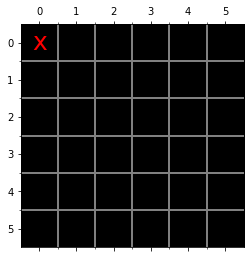

In [57]:
tesla.display_world()

In [58]:
tesla.print_state()

car's current state and motion: 
position:: [y, x] = [0, 0]
velocity:: [vy, vx] = [0, 1]


## Move and track the state

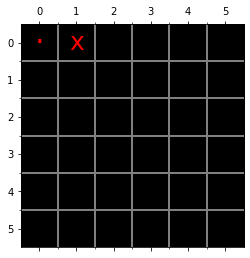

car's current state and motion: 
position:: [y, x] = [0, 1]
velocity:: [vy, vx] = [0, 1]


In [59]:
tesla.move()
tesla.display_world()
tesla.print_state()

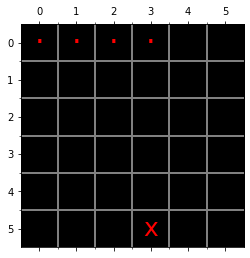

car's current state and motion: 
position:: [y, x] = [5, 3]
velocity:: [vy, vx] = [-1, 0]


In [60]:
tesla.move()
tesla.move()
tesla.turn_left()
tesla.move()
tesla.display_world()
tesla.print_state()

# Adding function turn_right()

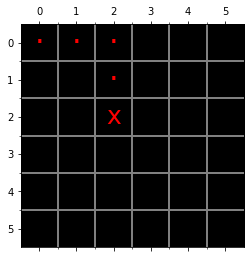

car's current state and motion: 
position:: [y, x] = [2, 2]
velocity:: [vy, vx] = [1, 0]


In [81]:
tesla = Car(inital_position, velocity, world)
tesla.move()
tesla.move()
tesla.turn_right()
tesla.move()
tesla.move()
tesla.display_world()
tesla.print_state()

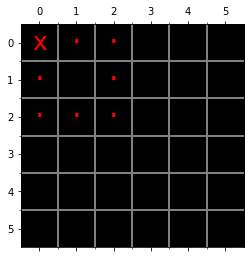

car's current state and motion: 
position:: [y, x] = [0, 0]
velocity:: [vy, vx] = [-1, 0]


In [82]:
tesla.turn_right()
tesla.move()
tesla.move()
tesla.turn_right()
tesla.move()
tesla.move()
tesla.display_world()
tesla.print_state()

# Adding another Car

Adding BMW with blue color, different initial position and velocity as same as tesla

Color codes:

* b: blue
*g: green
* r: red
* c: cyan
* m: magenta
* y: yellow
* k: black
* w: white

In [85]:
bmw_inital_position = [0,5]
bmw = Car(bmw_inital_position, velocity, world, 'b')

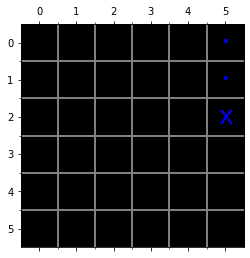

car's current state and motion: 
position:: [y, x] = [2, 5]
velocity:: [vy, vx] = [1, 0]


In [86]:
bmw.turn_right()
bmw.move()
bmw.move()
bmw.display_world()
bmw.print_state()

# Creating color background

In [113]:
# color.py

'''
The color class creates a color from 3 values, r, g, and b (red, green, and blue).
attributes:
    r - a value between 0-255 for red
    g - a value between 0-255 for green
    b - a value between 0-255 for blue
'''

class Color(object):
    def __init__(self, r, g, b):
        self.r = r
        self.g = g
        self.b = b

    def __repr__(self):
        plt.imshow([[(self.r/255, self.g/255, self.b/255)]])
        string = "rgb = [{}, {}, {}]".format(self.r, self.g, self.b)
        return string

    def __add__(self, other):
        self.r += other.r
        self.g += other.g
        self.b += other.b
        return Color(self.r, self.g, self.b)
        

rgb = [200, 0, 200]


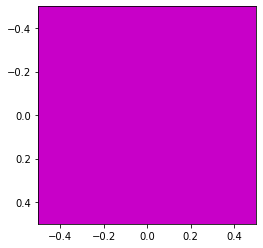

In [90]:
test_color = Color(200, 0, 200)
print(test_color)

rgb = [250, 0, 0]


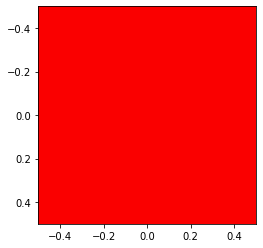

In [114]:
color1 = Color(250, 0, 0)
print(color1)

rgb = [0, 50, 200]


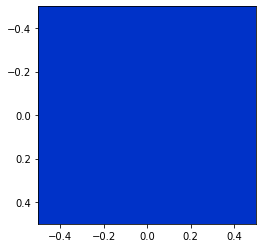

In [115]:
color2 = Color(0, 50, 200)
print(color2)

rgb = [250, 50, 200]


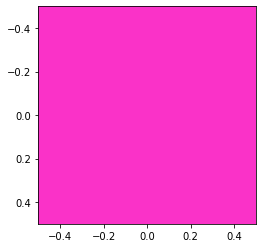

In [116]:
new_color = color1 + color2
print(new_color)